In [20]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

mod 19

In [ ]:
# "C:\Users\Owner\OneDrive\MSU Bootcamp\homework\19_challenge\Module_19_Starter_Code\Starter_Code\Resources\crypto_market_data.csv"

In [3]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(r"C:\Users\Owner\OneDrive\MSU Bootcamp\homework\19_challenge\Module_19_Starter_Code\Starter_Code\Resources\crypto_market_data.csv"
    ,
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [3]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [4]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [6]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
col_names = df_market_data.columns
print(col_names)

Index(['price_change_percentage_24h', 'price_change_percentage_7d',
       'price_change_percentage_14d', 'price_change_percentage_30d',
       'price_change_percentage_60d', 'price_change_percentage_200d',
       'price_change_percentage_1y'],
      dtype='object')


In [16]:
# names of coins - index
# coin_names = df_market_data['coin_id'].unique()

In [8]:
features_to_normalize = ['price_change_percentage_24h', 'price_change_percentage_7d',
       'price_change_percentage_14d', 'price_change_percentage_30d',
       'price_change_percentage_60d', 'price_change_percentage_200d',
       'price_change_percentage_1y']

In [9]:
features = df_market_data[features_to_normalize]

In [10]:
scaler = StandardScaler()

In [11]:
scaled_features = scaler.fit_transform(features)

In [12]:
df_market_data[features_to_normalize] = scaled_features

In [6]:
# Create a DataFrame with the scaled data


# Copy the crypto names from the original data

# Set the coinid column as index


# Display sample data


---

### Find the Best Value for k Using the Original Data.

In [17]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))

In [18]:
# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list


In [24]:
for k in range(1, 12):
    kmeans_model = KMeans(n_clusters=k, random_state=42)
    kmeans_model.fit(scaled_features)
    inertia_values.append(kmeans_model.inertia_)
print(inertia_values)   

C:\Users\Owner\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

[287.0, 195.82021818036046, 123.19048183836959, 79.02243535120975, 65.302379141625, 54.7399219421002, 43.48160605008147, 37.517032490103574, 32.59189097672458, 28.22289929060893, 24.116198421409198]


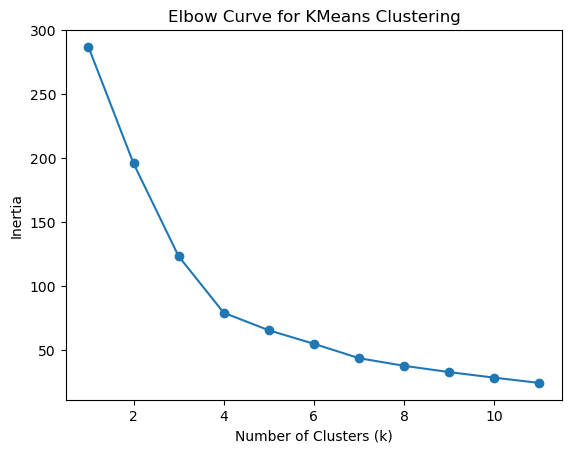

In [25]:
plt.plot(range(1, 12), inertia_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve for KMeans Clustering')
plt.show()

In [9]:
# Create a dictionary with the data to plot the Elbow curve


# Create a DataFrame with the data to plot the Elbow curve


In [10]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.


#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:4 

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [11]:
# Initialize the K-Means model using the best value for k


In [12]:
# Fit the K-Means model using the scaled data


In [13]:
# Predict the clusters to group the cryptocurrencies using the scaled data


# Print the resulting array of cluster values.


In [14]:
# Create a copy of the DataFrame


In [15]:
# Add a new column to the DataFrame with the predicted clusters


# Display sample data


In [16]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.


---

### Optimize Clusters with Principal Component Analysis.

In [17]:
# Create a PCA model instance and set `n_components=3`.


In [18]:
# Use the PCA model with `fit_transform` to reduce to 
# three principal components.

# View the first five rows of the DataFrame. 


In [19]:
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 

In [20]:
# Create a new DataFrame with the PCA data.

# Creating a DataFrame with the PCA data

# Copy the crypto names from the original data


# Set the coinid column as index


# Display sample data


---

### Find the Best Value for k Using the PCA Data

In [21]:
# Create a list with the number of k-values from 1 to 11


In [22]:
# Create an empty list to store the inertia values


# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list


In [23]:
# Create a dictionary with the data to plot the Elbow curve

# Create a DataFrame with the data to plot the Elbow curve


In [24]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.


#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:**


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** 

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [25]:
# Initialize the K-Means model using the best value for k


In [26]:
# Fit the K-Means model using the PCA data

In [27]:
# Predict the clusters to group the cryptocurrencies using the PCA data

# Print the resulting array of cluster values.


In [28]:
# Create a copy of the DataFrame with the PCA data


# Add a new column to the DataFrame with the predicted clusters


# Display sample data


In [29]:
# Create a scatter plot using hvPlot by setting 
# `x="PC1"` and `y="PC2"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.


### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

In [30]:
# Composite plot to contrast the Elbow curves

In [31]:
# Composite plot to contrast the clusters
# YOUR CODE HERE!

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** 